# 13. AMES HOUSING: DATA EXPLORATION
---

## 1. Introducing the Dataset
- **Dataset:** Sold houses in Ames, Iowa
    - Download [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt)
    - The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. [Link](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)
    - Information about the columns in the dataset is [here](https://s3.amazonaws.com/dq-content/307/data_description.txt). It's also saved as a test file: `data/Ames_Housing_data_description`
- **Origin:** Compiled by [Dean de Cock](https://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing.txt', delimiter="\t")
print(ames.shape)
ames.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Understanding the Data Types
- 23 nominal, 
- 23 ordinal, 
- 14 discrete, and 
- 20 continuous

This makes a total of 80 columns but the dataset has 82. The reason is probably do to the fact that `Order` and `PID` are not really useful features for the purpose of model of design. They are just there to help us identify individual entries.

In [33]:
ames = ames.drop(['Order', 'PID'], axis=1)
ames.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

## 3. Continuous Columns: 
#### can't be counted but can be measured
Let's start by identifying the 20 continuous data types. They are usually of the `float` type, however, we have 11 here. We need to find the other 9. We can use histograms, which will often show continuous intervals if the variable is continuous. Histograms of discrete variables often show a bar plot shape.

In [6]:
ames_float = ames.select_dtypes(include=['float64'])
ames_float.head()

,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
0,141.0,112.0,639.0,0.0,441.0,1080.0,1.0,0.0,1960.0,2.0,528.0
1,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
2,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
3,93.0,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,1968.0,2.0,522.0
4,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0


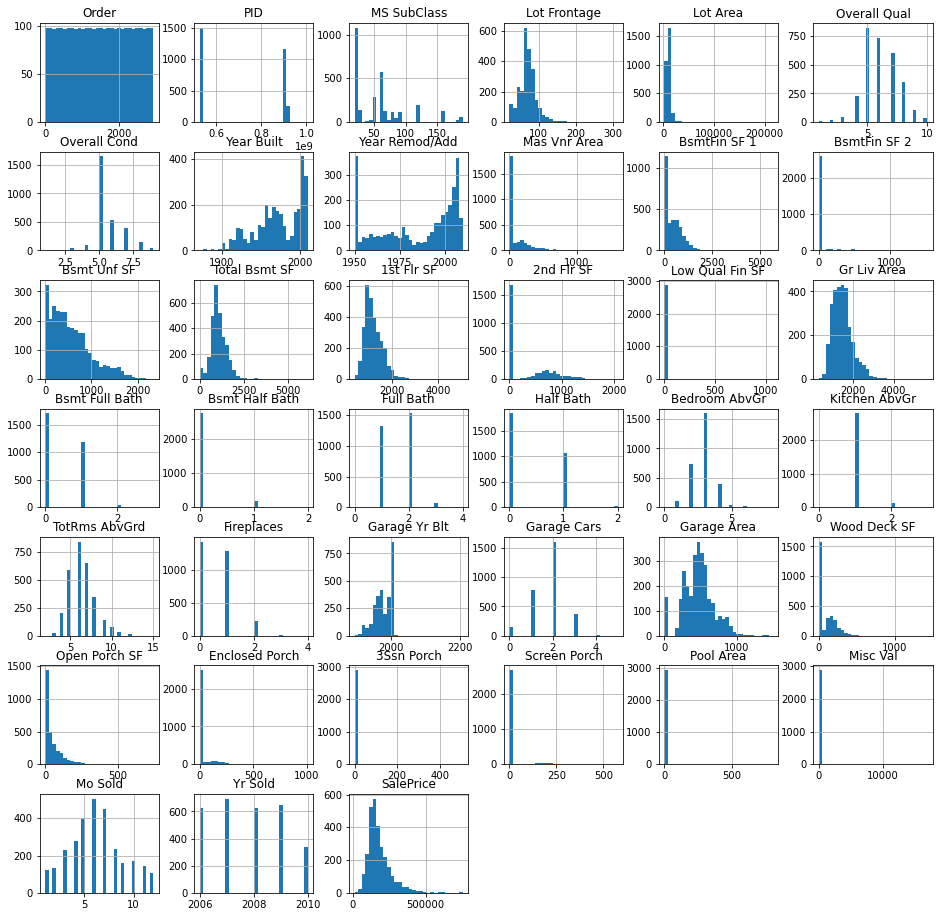

In [18]:
import matplotlib.pyplot as plt

ames.hist(bins=30, figsize=(16,16))
plt.show()

Let's create a list of what we believe are continuous columns solely based on how they histograms look. Then we can check each column to confirm if its data type is continuous

In [32]:
cont_cols = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
            'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area',
            'Garage Yr Blt', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice']
float_cols = ames_float.columns

for item in float_cols: 
    if (item not in cont_cols): 
        cont_cols.append(item) 
print(len(cont_cols)) 

ames[cont_cols].head()

21


,MS SubClass,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Gr Liv Area,Garage Yr Blt,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,BsmtFin SF 2,Bsmt Full Bath,Bsmt Half Bath,Garage Cars
0,20,141.0,31770,1960,1960,112.0,639.0,441.0,1080.0,1656,0,1656,1960.0,528.0,210,62,215000,0.0,1.0,0.0,2.0
1,20,80.0,11622,1961,1961,0.0,468.0,270.0,882.0,896,0,896,1961.0,730.0,140,0,105000,144.0,0.0,0.0,1.0
2,20,81.0,14267,1958,1958,108.0,923.0,406.0,1329.0,1329,0,1329,1958.0,312.0,393,36,172000,0.0,0.0,0.0,1.0
3,20,93.0,11160,1968,1968,0.0,1065.0,1045.0,2110.0,2110,0,2110,1968.0,522.0,0,0,244000,0.0,1.0,0.0,2.0
4,60,74.0,13830,1997,1998,0.0,791.0,137.0,928.0,928,701,1629,1997.0,482.0,212,34,189900,0.0,0.0,0.0,2.0


Let's now go to our data description to check which columns in our `con_cols` list should not be there:
- `MS SubClass`: Identifies the type of dwelling involved in the sale. `Not continuous`
- `Year Built`: Original construction date. `Discrete`
- `Year Remod/Add`: Remodel date (same as construction date if no remodeling or additions). `Discrete`

In [24]:
x = 24
y = 20
list = [10, 20, 30, 40, 50 ]
  
if ( x not in list ): 
    print("x is NOT present in given list") 
else: 
    print("x is  present in given list") 

x is NOT present in given list


In [25]:
if ( y in list ): 
    print("y is present in given list") 
else: 
    print("y is NOT present in given list") 

y is present in given list


In [27]:
list1=[1,2,3,4,5] 
list2=[6,7,8,9] 
for item in list1: 
    if (item not in list2): 
        list2.append(item)    
else: 
    print("overlapping") 
    
list2

overlapping


[6, 7, 8, 9, 1, 2, 3, 4, 5]

In [30]:
float_cols

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')